# Entry G19c notebook: Neighborhood Node Counts

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('once')

from neo4j import GraphDatabase

In [3]:
uri = "bolt://localhost:7687"

driver = GraphDatabase.driver(uri, auth=('neo4j', 'password'))

uni_session = driver.session(database="unimodal")

C:\Users\jfish\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Neighbor Counts and Villain Percent

In [4]:
def nearest_villains(con, model_type='uni', max_level=2):
    if model_type == 'uni' or model_type == 'mix':
        rel_type = 'KNOWS'
    else:
        max_level = max_level * 2
        rel_type = 'APPEARS_IN'
        
    v_query = '''MATCH (h:Hero)
    call apoc.path.spanningTree(h, {minLevel: 1, maxLevel:'''  + f"{max_level}, labelFilter:'>Villain', relationshipFilter:'{rel_type}'" + '''})
    YIELD path
    RETURN h.name as name, labels(h)[-1] as type, length(path) as distance, count(path) as villain_ct'''
    
    h_query = '''MATCH (h:Hero)
    call apoc.path.spanningTree(h, {minLevel: 1, maxLevel:'''  + f"{max_level}, labelFilter:'>Hero', relationshipFilter:'{rel_type}'" + '''})
    YIELD path
    RETURN h.name as name, labels(h)[-1] as type, length(path) as distance, count(path) as total_ct'''
    
    df = pd.DataFrame(con.run(v_query).data()).merge(
    pd.DataFrame(con.run(h_query).data()),
    on = ['name', 'type', 'distance'], how='outer').fillna(0)
    df['villain_pct'] = df['villain_ct'] / df['total_ct']
    return df

In [5]:
uni_neighbors = nearest_villains(uni_session, max_level=6)
uni_neighbors

,name,type,distance,villain_ct,total_ct,villain_pct
0,24-HOUR MAN/EMMANUEL,Hero,2,3.0,30,0.100000
1,24-HOUR MAN/EMMANUEL,Hero,3,285.0,1281,0.222482
2,24-HOUR MAN/EMMANUEL,Hero,4,590.0,5008,0.117812
3,24-HOUR MAN/EMMANUEL,Hero,5,3.0,78,0.038462
4,3-D MAN/CHARLES CHAN,Hero,1,11.0,122,0.090164
...,...,...,...,...,...,...
25537,"ZOLA, ARNIM",Villain,4,0.0,3,0.000000
25538,ZONA,Hero,1,0.0,23,0.000000
25539,"ZOTA, CARLO",Hero,4,0.0,8,0.000000
25540,ZURI,Hero,4,0.0,10,0.000000


In [6]:
def stacked_hist_w_log1(df, plot_title = None, col_names=['total_ct', 'villain_ct', 'villain_pct']):
    distances = df.sort_values('distance')['distance'].unique()
    col_plots = 2
    row_plots = len(distances) * len(col_names)
    x_size = col_plots *6
    y_size = row_plots *4
    row_nbr = 0
    fig, axes = plt.subplots(row_plots, col_plots, figsize=(x_size,y_size))
    fig.suptitle(plot_title)
    for dist in distances:
        for col_name in col_names:
            for col in range(col_plots):
                dframe = df.loc[df['distance'] == dist, ['name', 'type', col_name]]
                sns.histplot(dframe, ax = axes[row_nbr, col], x=col_name, hue='type', stat='count', multiple='stack')
                if col == 0:
                    axes[row_nbr, col].set_title(col_name + ', Distance: '+ str(dist))
                else:
                    axes[row_nbr, col].set_yscale('log')
                    axes[row_nbr, col].set_title(col_name + ', Distance: ' + str(dist) + ' log')
            row_nbr += 1
    plt.tight_layout()
    plt.show()

C:\Users\jfish\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


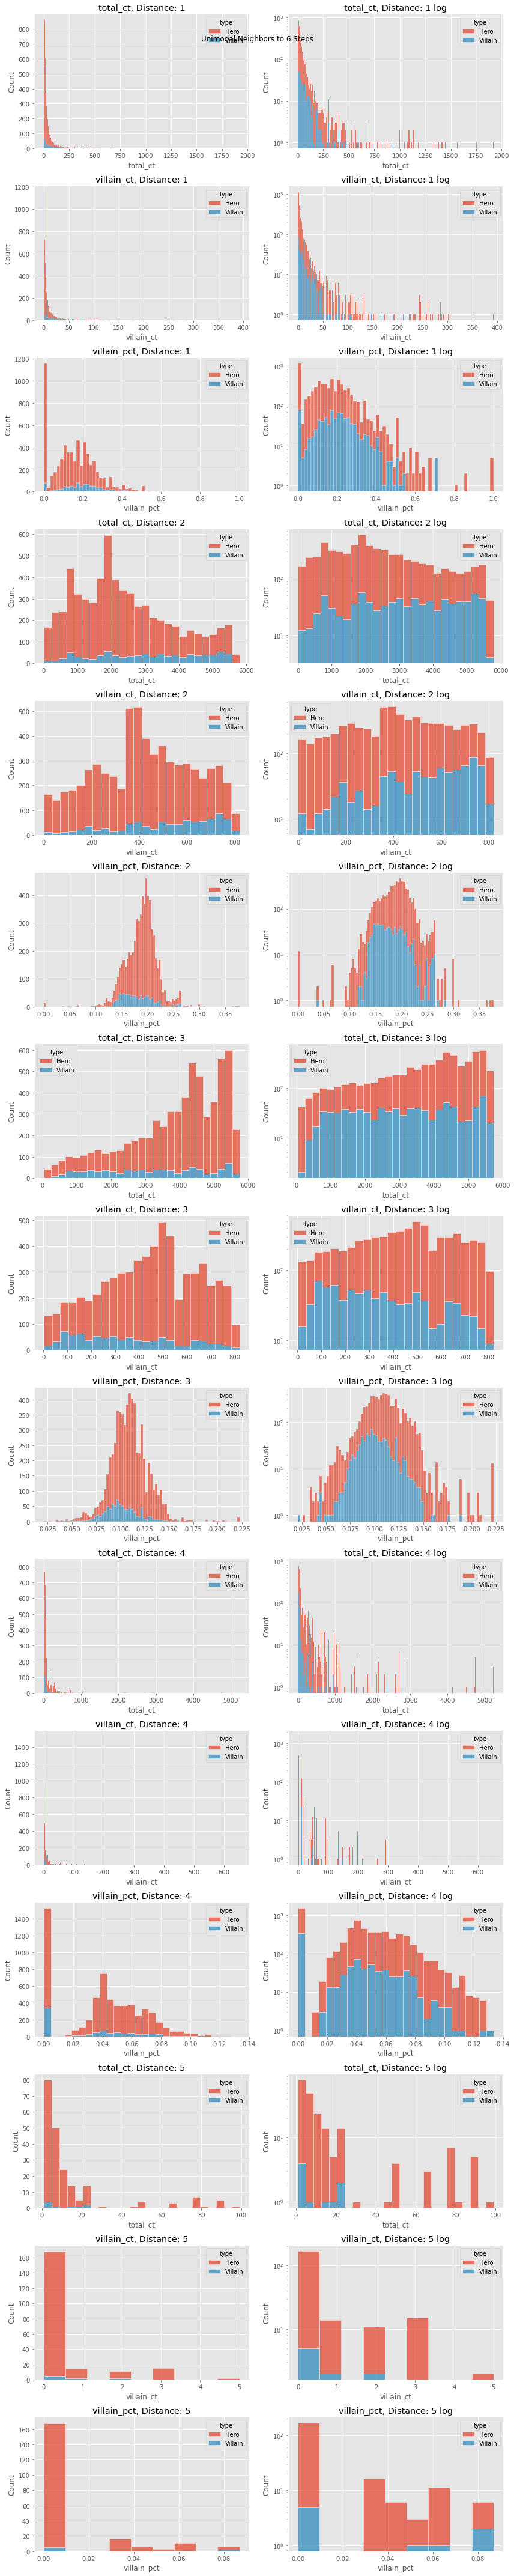

In [52]:
stacked_hist_w_log1(uni_neighbors, plot_title="Unimodal Neighbors to 6 Steps")

In [7]:
def stacked_hist_w_log2(df, plot_title = None, col_names=['total_ct', 'villain_ct', 'villain_pct']):
    distances = df.sort_values('distance')['distance'].unique()
    col_plots = 2
    row_plots = len(distances) * len(col_names)
    x_size = col_plots *6
    y_size = row_plots *4
    row_nbr = 0
    fig, axes = plt.subplots(row_plots, col_plots, figsize=(x_size,y_size))
    fig.suptitle(plot_title)
    for col_name in col_names:
        for dist in distances:
            for col in range(col_plots):
                dframe = df.loc[df['distance'] == dist, ['name', 'type', col_name]]
                sns.histplot(dframe, ax = axes[row_nbr, col], x=col_name, hue='type', stat='count', multiple='stack')
                if col == 0:
                    axes[row_nbr, col].set_title(col_name + ', Distance: '+ str(dist))
                else:
                    axes[row_nbr, col].set_yscale('log')
                    axes[row_nbr, col].set_title(col_name + ', Distance: ' + str(dist) + ' log')
            row_nbr += 1
    plt.tight_layout()
    plt.show()

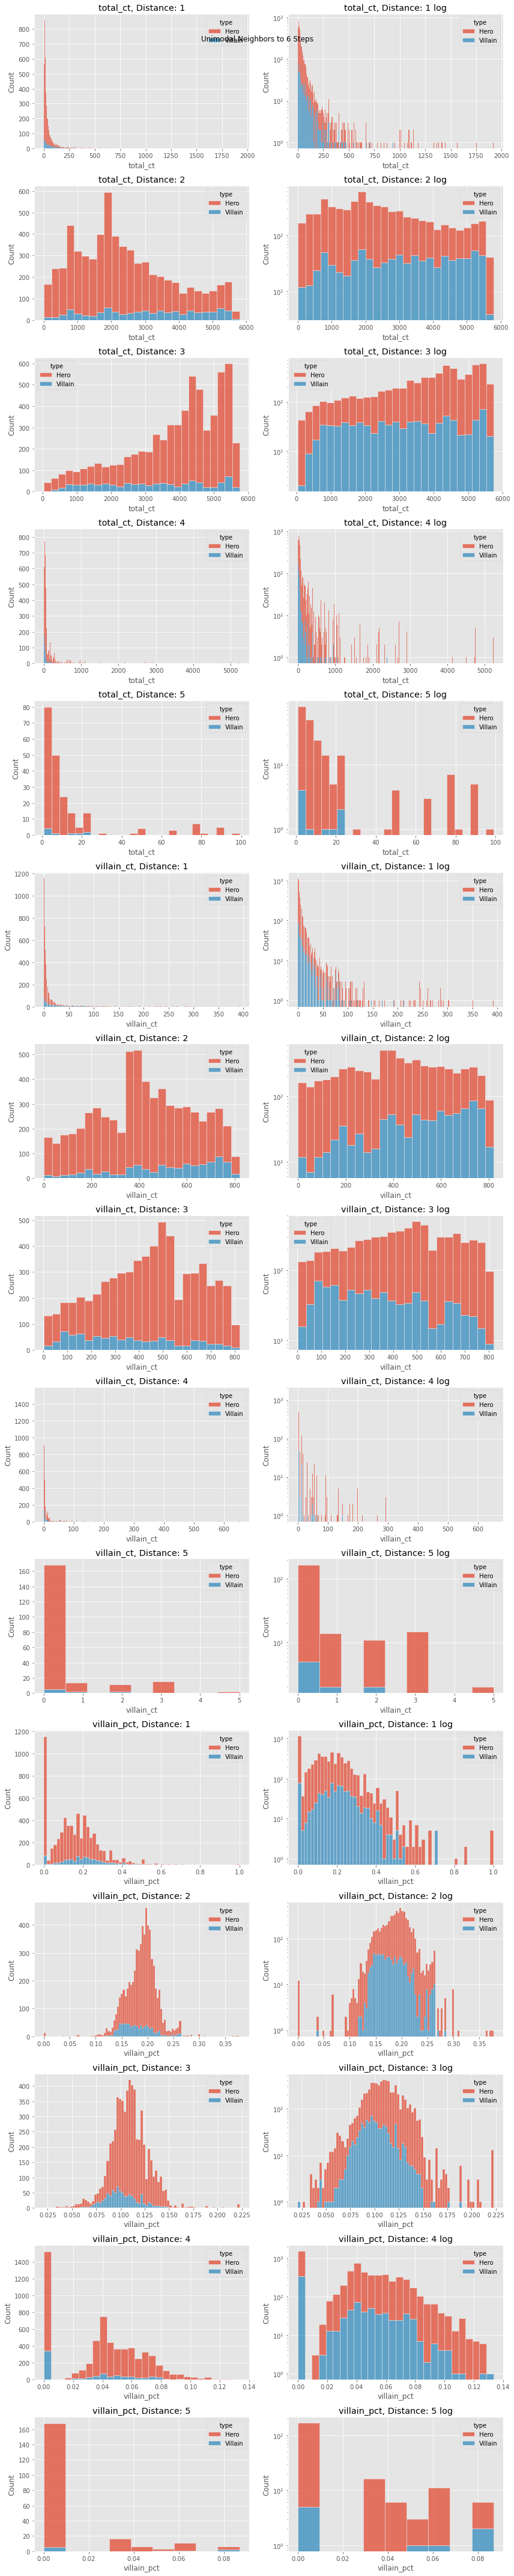

In [49]:
stacked_hist_w_log2(uni_neighbors, plot_title="Unimodal Neighbors to 6 Steps")

In [9]:
uni_neighbors_long = nearest_villains(uni_session, max_level=16)
uni_neighbors_long

C:\Users\jfish\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,type,distance,villain_ct,total_ct,villain_pct
0,24-HOUR MAN/EMMANUEL,Hero,2,3.0,30,0.100000
1,24-HOUR MAN/EMMANUEL,Hero,3,285.0,1281,0.222482
2,24-HOUR MAN/EMMANUEL,Hero,4,590.0,5008,0.117812
3,24-HOUR MAN/EMMANUEL,Hero,5,3.0,78,0.038462
4,3-D MAN/CHARLES CHAN,Hero,1,11.0,122,0.090164
...,...,...,...,...,...,...
25537,"ZOLA, ARNIM",Villain,4,0.0,3,0.000000
25538,ZONA,Hero,1,0.0,23,0.000000
25539,"ZOTA, CARLO",Hero,4,0.0,8,0.000000
25540,ZURI,Hero,4,0.0,10,0.000000


C:\Users\jfish\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


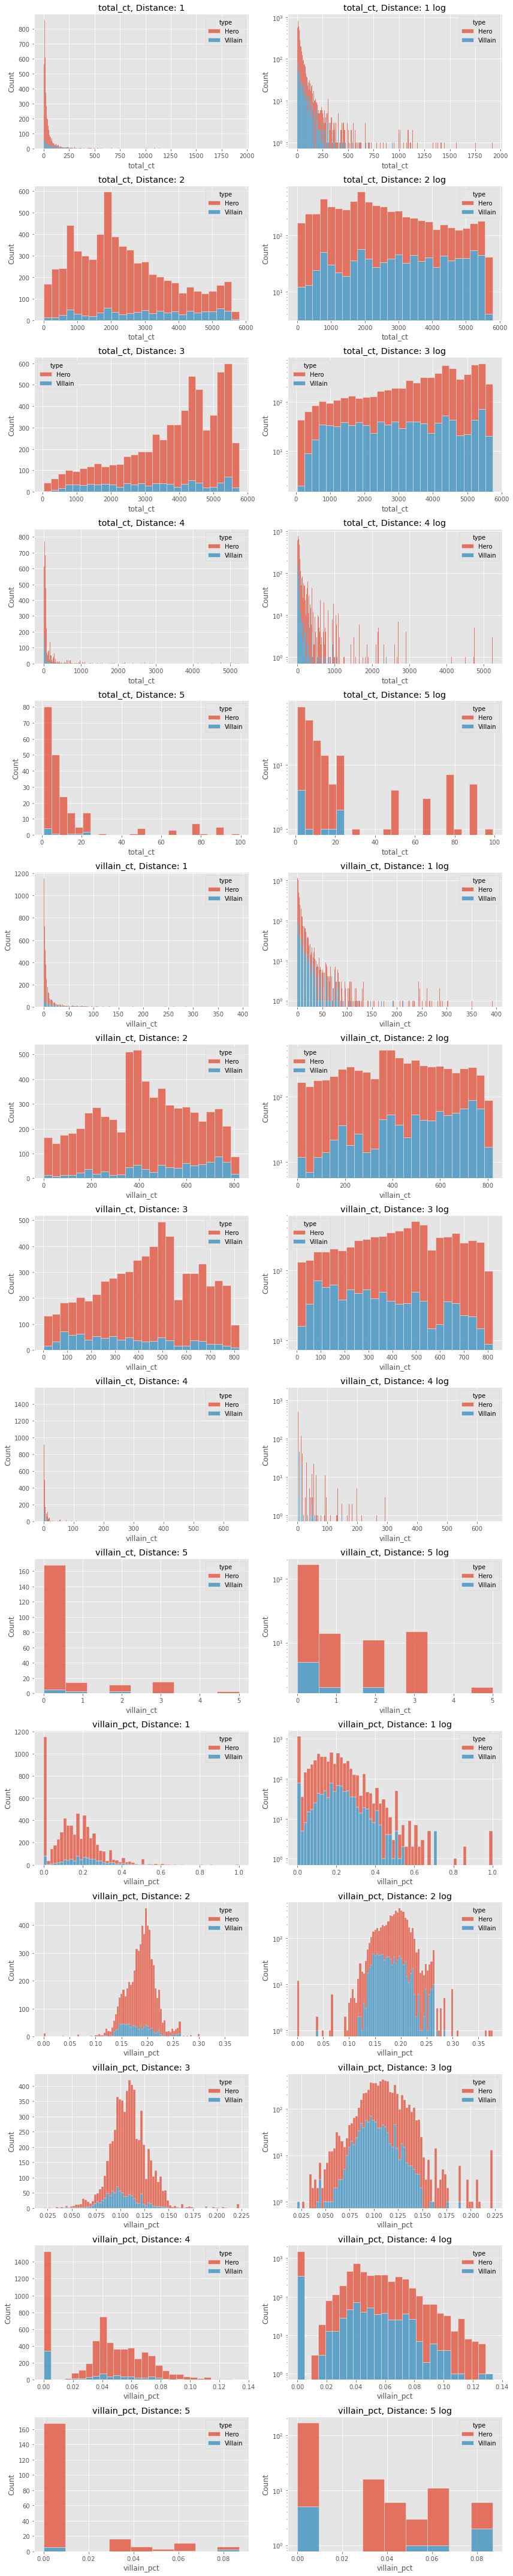

In [10]:
stacked_hist_w_log2(uni_neighbors_long)